## Exercício 1 (2 pontos)

a) Explique o que são GAMs e quais suas principais vantagens em relação à regressão linear. 

Descreva cenários onde a GAM funcionaria bem e a regressão linear teria um desempenho pior, justificando o motivo para a diferença de desempenho.




***Resposta:*** GAMs são modelos aditivos generalizados, um tipo de modelo paramétrico que pode ser decomposto a adição de funções arbitrárias dos preditores de um conjunto de dados. Toda GAM pode ser decomposta em:
$$
    g(x) = \beta_0 + \beta_1 f_1 (x_1) + \beta_2 f_2 (x_2) + \beta_3 f_3 (x_3) + \cdots + \beta_n f_n (x_n)
$$
GAMs são modelos muito flexíveis que podem se ajustar muito bem a muitos tipos de dados, incluindo preditores que possuem relações não lineares com a resposta. Porém por serem tão flexíveis esse tipo de modelo pode facilmente sofrer de variância excessiva em conjuntos de dados que não precisam de tanta complexidade ou que não possuem uma amostra grande o bastante para descrever a complexidade dos dados, resultando em um ajuste inferior ao que poderia ser obtido com uma regressão linear.

b) Explique com suas palavras o que são árvores de decisão e como elas são construídas.

Além disso, explique como a profundidade e número de nós de uma árvore influenciam no viés e variância do modelo.


***Resposta:*** Árvores de decisão são um tipo de modelo preditivo baseado em condições sobre os dados tomadas de forma sequencial, e dependendo do conjunto na qual uma entrada se encontra ao final de uma série de tomada de decisões, os valores preditos serão diferentes.

Árvores podem ser usadas para regressão, onde cada nó folha possui um valor contínuo e a árvore mais ajustada é decidida como a que minimiza o RSS.

Árvores também podem ser usadas para classificação, onde cada nó folha prediz uma classe e a árvore mais ajustada pode ser decidida como a que minimiza a entropia, a entropia cruzada ou o coeficiente de Gini, dependendo do contexto.

Quanto mais profunda e maior o número de nós de uma árvore, mais específicas são as condições da árvore, o que faz com que as predições sejam mais ajustadas ao conjunto de treino. Porém, profundidade e número de nós excessivos podem fazer com queo modelo sofra de excesso de variância, enquanto árvores menos profundas e com menos nós tendem a sofrer menos de problemas com variância, mas podem ser simples demais e não generalizar bem nos dados reais, sofrendo de viés excessivo.

c) Descreva o que são florestas aleatórias e algoritmos de boosting com árvores. Em seguida, compare ambos os algoritmos nos seguintes quesitos:

i) Modo de construção das árvores

ii) Principais parâmetros e como eles alteram a construção das árvores


***Resposta:***

**Florestas aleatórias:** Modelo que usa uma árvore de decisão onde cada divisão da árvore é feita usando um conjunto aleatório de preditores e organizado usando bagging (bootstrapping aggregation), uma técnica onde vários modelos são treinados com amostras diferentes do mesmo conjunto de treino e o resultado final predito é a média do resultado desses modelos. Por usar essa técnica é possível avaliar o ajuste das árvores usando os dados que não foram escolhidos no conjunto de treino (estimativa de erro out-of-bag), que pode ser usado para estimar os parâmetros que definem a árvore.

Seus principais parâmetros são o número de preditores nas divisões, o número de árvores e a profundidade.

**Algoritmos de boosting com árvores:** Técnica usada para gerar uma sequência de preditores com uma noção de deficiência, tal que o próximo preditor que será treinado melhora as deficiências do anterior. Essa ordem durante o treinamento faz com que as árvores treinadas façam divisões que descrevam melhor os dados incrementalmente, generalizando melhor os dados preditos e trazendo melhor ajuste aos dados reais. Em especial, a técnica de gradient boosting usa erro dos resultados do modelo gerado no passo anterior, otimizando seus coeficientes para compensar o erro na etapa anterior e aumentando o desempenho geral durante o treino dos dados.

Seus principais parâmetros são a taxa de aprendizado, o número de árvores e a profundidade das árvores.

d) Neste item focaremos nas SVMs para classificação. Usando suas palavras, explique:

i) O que são SVMs lineares e como elas se diferenciam da regressão logística

ii) O que são kerneis radiais e polinomiais e quais as vantagens e desvantagens destes kerneis com relação ao kernel linear.







***Resposta:*** SVMs lineares são modelos que diferentemente da regressão logística, obtém modelos lineares que usam hiperplanos que maximizam as margens do limiar de classificação, resultando em um modelo que é mais generalizado mas que sofre mais com variações nos dados de treino, e portanto pode sofrer mais facilmente de variância excessiva.

Kerneis radiais e polinomiais contemplam outras medidas de distância entre os pontos e quando os dados possuem essa noção espacial, como pode acontecer em  espaços não lineares de alta dimensionalidade. Nesses casos esses kernels podem se ajustar melhor aos modelos porém eles aumentam ainda mais a flexibilidade dos modelos, o que pode piorar o problema de excesso de variância. 

---
# Parte 2 - Prática

Nos exercícios abaixo, vocês usarão um conjunto de dados relativos ao tempo de execução de aplicações em diferentes arquiteturas de computadores.

Os preditores são:
```
'instP': número de instruções de processamento
'clock': frequência do relógio do processador
'pipelines': número de linhas de processamento no processador
'instM': número de instruções de acesso à memória
'latency': latência de acesso à memória
'transfM': quantidade de dados usados pela aplicação
'band': çargura de banda da memória do computador
```
São fornecidos 2 conjuntos de dados:

`dados100.csv`: contém 100 amostras de tempo de execução e preditores

`dados1000.csv`: contém 1000 amostras de tempo de execução e preditores

**Importante:** Após ler o DataFrame, não esqueça de retirar a resposta y do DataFrame. Caso contrário seus modelos sempre acertarão a predição :-)

Também não esqueça de normalizar seus dados com o StandardScaler. Caso contrários alguns modelos não funcionarão corretamente.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from pygam import LinearGAM

from sklearn.svm import SVR

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate, KFold, train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

## Exercício 2: (2 pontos)

a) Leia os dados do arquivo `dados100.csv`, que contém 100 exemplos de execuções e realize a regressão utilizando os seguintes regressores: Regressão Linear, Árvores de Decisão, GAM, RandomForest e XGBoost. No caso do XGBoost, utilize a interface do Scikit-learn

Rode com os parâmetros padrão e calcule o $r^2$ de cada modelo usando validação cruzada.

In [ ]:
df = pd.read_csv("dados100.csv")
standardScaler = StandardScaler()
data = pd.DataFrame(standardScaler.fit_transform(df), columns=df.columns)

y = data.pop("y")
X = data.copy()


In [ ]:
def validacaoCruzada(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = []

    for train_idx, vali_idx in kf.split(X):
        model.fit(X.iloc[train_idx], y[train_idx])
        pred = model.predict(X.iloc[vali_idx])
        r2.append(r2_score(y[vali_idx], pred))

    return np.mean(r2)


regressors = {
    "Regressão Linear": LinearRegression,
    "Árvores de Decisão": DecisionTreeRegressor,
    "RandomForest": RandomForestRegressor,
    "XGBoost": XGBRegressor,
}

for label, regressor in regressors.items():
    model = regressor()
    cv_results = cross_validate(model, X, y, cv=5, scoring=("r2"))
    print(f"R² ({label}): {np.mean(cv_results['test_score']):.2%}")

gam = LinearGAM()
r2 = validacaoCruzada(gam, X, y)
print(f"R² (GAM): {r2:.2%}")


R² (Regressão Linear): 17.41%
R² (Árvores de Decisão): 4.83%
R² (RandomForest): 35.58%
R² (XGBoost): 27.71%
R² (GAM): -8.25%


b) Faça o mesmo procedimento que no item a, mas agora usando o arquivo `dados1000.csv`. 

Em seguida, na seção Discussão abaixo, discuta:

i) Por que houve uma diferença tão grande entre os 2 conjuntos de dados?

ii) Por que o desempenho das Árvores de Decisão,  Florestas Aleatórias, Xgboost e GAMs foram superiores à regressão Linear? 

In [ ]:
df = pd.read_csv("dados1000.csv")
standardScaler = StandardScaler()
data = pd.DataFrame(standardScaler.fit_transform(df), columns=df.columns)

y = data.pop("y")
X = data.copy()


In [ ]:
regressors = {
    "Regressão Linear": LinearRegression,
    "Árvores de Decisão": DecisionTreeRegressor,
    "RandomForest": RandomForestRegressor,
    "XGBoost": XGBRegressor,
}

for label, regressor in regressors.items():
    model = regressor()
    cv_results = cross_validate(model, X, y, cv=5, scoring=("r2"))
    print(f"R² ({label}): {np.mean(cv_results['test_score']):.2%}")

gam = LinearGAM()
r2 = validacaoCruzada(gam, X, y)
print(f"R² (GAM): {r2:.2%}")


R² (Regressão Linear): 30.56%
R² (Árvores de Decisão): 49.12%
R² (RandomForest): 79.12%
R² (XGBoost): 78.22%
R² (GAM): 35.76%


***Discussão:***

i) Quando o conjunto de treino não é suficientemente grande, os modelos mais flexíveis podem sofrer de excesso de variância, obtendo coeficientes que não predizem bem os dados de validação e trazendo um ajuste inferior ao que poderia ser encontrado com técnicas mais rígidas e com maior viés. Com o aumento do conjunto de teste no segundo conjunto, as complexidades dos dados de treino ficam mais evidentes e os coeficientes dos modelos mais complexos convergem para valores que trazem um ajuste maior do que os modelos mais rígidos, trazendo resultados mais satisfatórios.

ii) Todas essas técnicas possuem muito mais flexibilidade que a regressão linear, e com dados o suficiente foi possível obter um modelo com viés menor sem variância excessiva que resulta modelos mais ajustados que a regressão linear nos demais casos.

## Exercício 3: (4 pontos)

a) Veremos agora como otimizar os parâmetros dos diferentes modelos:

Começaremos com as Florestas Aleatórias. Faça uma busca de parâmetros para a classe RandomForest do scikit-learn e use o OOB para estimar o erro de teste.

Gere um gráfico com 3 curvas, cada uma com um diferente número de `max_features` que são usadas em cada divisão das árvores. Use os valores 'auto', 'sqrt' e 'log2'. No eixo x do gráfico, coloque qual a profundidade máxima da árvore e no eixo y o $r^2$.


Escolha uma faixa de valores que indique qual o melhor desempenho do modelo e ajuste os eixos de modo a facilitar a visualização.

In [ ]:
X_train, X_vali, y_train, y_vali = train_test_split(
    X, y, test_size=0.20, random_state=42
)


Best max depth (max_features = auto): 5.00 (R² = 74.98%)
Best max depth (max_features = sqrt): 5.00 (R² = 55.68%)
Best max depth (max_features = log2): 5.00 (R² = 55.68%)


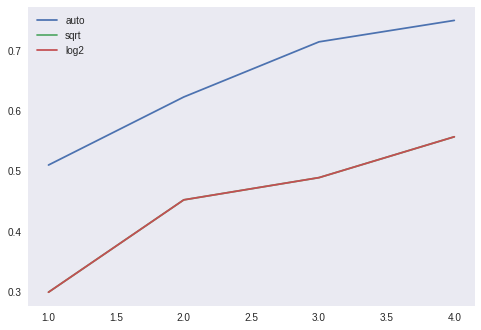

In [71]:
oob = {"auto": [], "sqrt": [], "log2": []}

for max_features in ["auto", "sqrt", "log2"]:
    best_max_depth = None
    best_score = None
    for max_depth in range(2, 6):
        rf = RandomForestRegressor(
            random_state=42,
            oob_score=True,
            max_features=max_features,
            max_depth=max_depth,
        )
        rf.fit(X_train, y_train)
        oob[max_features].append(rf.oob_score_)
        if best_score is None or best_score < rf.oob_score_:
            best_max_depth = max_depth
            best_score = rf.oob_score_
    print(f'Best max depth (max_features = {max_features}): {best_max_depth:.2f} (R² = {best_score:.2%})')
    plt.plot(
        np.arange(1, len(oob[max_features]) + 1), oob[max_features], label=max_features
    )

plt.legend()
plt.grid()
plt.show()


<span style="color: yellow">**OBS**: A reta da Árvore com `max_features = sqrt` não está aparente porque possui os mesmos valores que `max_features = log2`.</span>

In [ ]:
oob["sqrt"] == oob["log2"]


True

b) Faça o mesmo para o **XgBoost**. Mas agora, gere uma curva para cada valor de 'max_depth' e no eixo X coloque o valor de 'gamma'. 

Escolha uma faixa de valores que indique qual o melhor desempenho do modelo e ajuste os eixos de modo a facilitar a visualização.


Best gamma (max_depth = 2): 0.10 (R² = 76.79%)
Best gamma (max_depth = 3): 0.10 (R² = 81.38%)
Best gamma (max_depth = 4): 0.15 (R² = 82.37%)
Best gamma (max_depth = 5): 0.20 (R² = 80.22%)


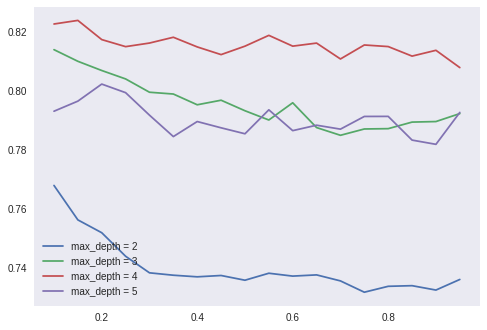

In [66]:
r2 = {}

for max_depth in range(2, 6):
    r2[max_depth] = []
    best_gamma = None
    best_score = None
    for gamma in np.arange(0.1, 1, 0.05):
        xgbr = XGBRegressor(n_estimators=100, max_depth=max_depth, gamma=gamma)
        xgbr.fit(X_train, y_train)
        cv_results = cross_validate(xgbr, X, y, cv=5, scoring=("r2"))
        curr_r2 = np.mean(cv_results["test_score"])
        r2[max_depth].append(curr_r2)
        if best_score is None or best_score < curr_r2:
                best_gamma = gamma
                best_score = curr_r2
        
    print(f'Best gamma (max_depth = {max_depth}): {best_gamma:.2f} (R² = {best_score:.2%})')
    plt.plot(np.arange(0.1, 1, 0.05), r2[max_depth], label=f"max_depth = {max_depth}")

plt.legend()
plt.grid()
plt.show()


c) Faça o mesmo para o SVM para regressão. No scikit-learn, a classe que implementa o regressor é a SVR. Mas agora, gere doi gráficos:

1) com uma curva para cada tipo de kernel e no eixo X coloque o valor de 'epsilon'. Lembrando que o epsilon define a largura das margens para a regressão.

2) escolha no item 1, para cada kernel, qual o melhor valor de 'epsilon'. Agora, gere um gráfico onde cada linha é representa um kernel, o eixo X diferentes valores de 'C' e o eixo y o $r^2$. 

Escolha uma faixa de valores que indique qual o melhor desempenho do modelo e ajuste os eixos de modo a facilitar a visualização.

Best epsilon (rbf): 0.30 (R² = 50.20%)
Best epsilon (poly): 0.60 (R² = 39.78%)


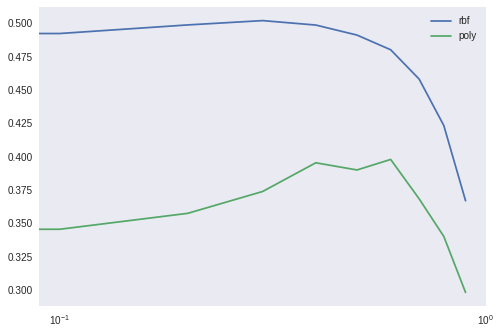

In [54]:
epsilon_values = np.arange(0, 1, 0.1)
kernels = ['rbf', 'poly']


for kernel in kernels:
    r2 = []
    best_epsilon = None
    best_score = None
    for epsilon in epsilon_values:
        model = SVR(kernel=kernel, epsilon=epsilon)
        cv_results = cross_validate(model, X, y, cv=5, scoring=("r2"))
        
        curr_r2 = np.mean(cv_results["test_score"])
        r2.append(curr_r2)
        
        if best_score is None or best_score < curr_r2:
            best_epsilon = epsilon
            best_score = curr_r2
        
    print(f'Best epsilon ({kernel}): {best_epsilon:.2f} (R² = {best_score:.2%})')
    plt.plot(epsilon_values, r2, label=kernel)

plt.legend()
plt.xscale("log")
plt.grid()
plt.show()

Best C (rbf): 10.00 (R² = 62.16%)
Best C (poly): 10.00 (R² = 39.85%)


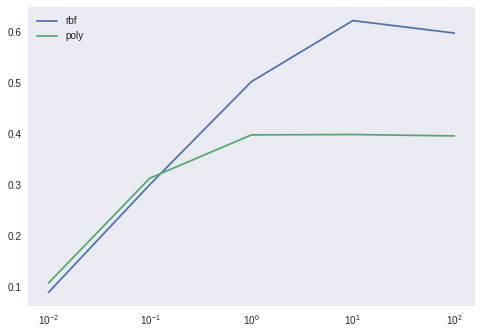

In [64]:
C_values = [0.01, 0.1, 1, 10, 100]

# rbf

r2 = []
best_C = None
best_score = None
for C in C_values:
    model = SVR(kernel='rbf', epsilon=0.3, C=C)
    cv_results = cross_validate(model, X, y, cv=5, scoring=("r2"))
    
    curr_r2 = np.mean(cv_results["test_score"])
    r2.append(curr_r2)
    
    if best_score is None or best_score < curr_r2:
        best_C = C
        best_score = curr_r2
    
print(f'Best C (rbf): {best_C:.2f} (R² = {best_score:.2%})')
plt.plot(C_values, r2, label='rbf')

# poly

r2 = []
best_C = None
best_score = None
for C in C_values:
    model = SVR(kernel='poly', epsilon=0.6, C=C)
    cv_results = cross_validate(model, X, y, cv=5, scoring=("r2"))
    
    curr_r2 = np.mean(cv_results["test_score"])
    r2.append(curr_r2)
    
    if best_score is None or best_score < curr_r2:
        best_C = C
        best_score = curr_r2
    
print(f'Best C (poly): {best_C:.2f} (R² = {best_score:.2%})')
plt.plot(C_values, r2, label='poly')

plt.legend()
plt.xscale("log")
plt.grid()
plt.show()

d) Discuta os resultados obtidos. 

i) Para cada um dos modelos, quais parâmetros resultaram no melhor desempenho

ii) para o SVR, qual parâmetro pareceu mais relevante, o epsilon ou 'C'?

iii) Qual modelo você escolheria para o seus dados?

***Discussão:***

i)

* Random Forest: `max_predictors = 'auto'` e `max_depth = 5`
* Boosting: `max_depth` = 4 e $\gamma = 0.15$
* SVR: Kernel radial, $\epsilon = 0.6$ e C = 10.

ii) Valores muito altos para $\epsilon$ trouxeram uma redução muito mais severa no R² (efetivamente inviabilizando os modelos treinados) que valores muito grandes em C, que apenas pioraram o R² e aumentaram muito o tempo de treino dos modelos. Portanto ajustar o valor de $\epsilon$ aparenta ser muito mais impactante.

iii) Escolheria a árvore com boosting por possuir R² significativamente maior que o SVR (por ~20%) e a Random Forest (por ~10%).

## Exercício 4: (2 pontos)

Conhecimento de Domínio

Você consultou uma especialista da área de computação e ela lhe explicou que o tempo de execução é proporcional a 3 fatores:
- Tempo de execução das instruções: `instP/(clock*pipelines)`
- Tempo para acesso à memória: `instM * latency` 
- Tempo para transferência de dados da memória: `transfM / band`

Com base nesse conhecimento:

a) Crie novas preditores compostos, dados por combinações entre os preditores já existentes (ex: `A*B`, `A/B`, `A/(B*C)`, etc.). 

Em seguida, tente fazer a predição usando a regressão linear, GAM e Random Forests usando os dados `dados1000.csv`. Mostre os $r^2$ obtidos com o uso de validação cruzada.



In [ ]:
df = pd.read_csv("dados1000.csv")
df["exec_time"] = df["instP"] / (df["clock"] * df["pipelines"])
df["access_time"] = df["instM"] * df["latency"]
df["trans_time"] = df["transfM"] / df["band"]
standardScaler = StandardScaler()
data = pd.DataFrame(standardScaler.fit_transform(df), columns=df.columns)

y = data.pop("y")
X = data.copy()


In [ ]:
model = LinearRegression()
cv_results = cross_validate(model, X, y, cv=5, scoring=("r2"))
print(f"R2 (Linear Regression): {np.mean(cv_results['test_score']):.2%}")

gam = LinearGAM()
r2 = validacaoCruzada(gam, X, y)
print(f"R2 (GAM): {r2:.2%}")

model = RandomForestRegressor()
cv_results = cross_validate(model, X, y, cv=5, scoring=("r2"))
print(f"R2 (Linear Regression): {np.mean(cv_results['test_score']):.2%}")


R2 (Linear Regression): 96.35%
R2 (GAM): 94.58%
R2 (Linear Regression): 93.77%


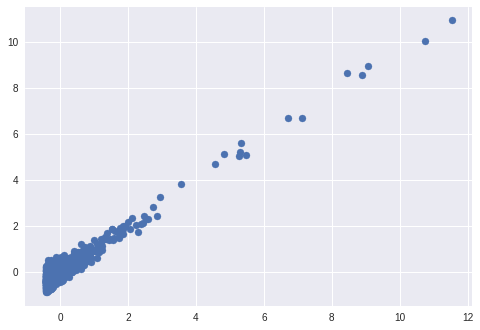

In [ ]:
plt.scatter(X["exec_time"], y)


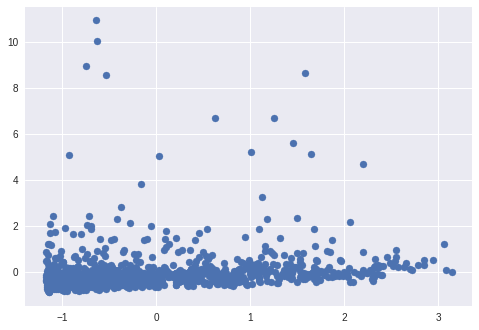

In [ ]:
plt.scatter(X["access_time"], y)


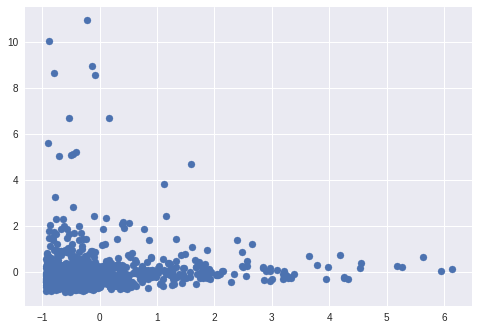

In [ ]:
plt.scatter(X["trans_time"], y)


b) Por que houve uma melhora tão grande nos classificadores lineares comparado com o caso dos dados originais (exercícios 2 e 3)?

Discuta também qual o papel do conhecimento de domínio ao aplicar algoritmos de aprendizado de máquina.

***Discussão:***

Provavelmente os novos preditores compostos possuem relação fortemente linear com y (em especial `exec_time` aparenta ter uma relação fortemente linear com y), aumentando drasticamente a a performance dos classificadores lineares comparado aos demais preditores, que não possuem uma relação desse tipo.

Conhecimento de domínio pode trazer formas de criar preditores ou encontrar novos preditores que logicamente afetam o resultado do que está sendo predito, e pode afetar muito fortemente o resultado do modelo. Antes de qualquer trabalho de aprendizado de máquina é necessário entender o contexto e avaliar o que pode ser feito antes de desenvolver qualquer modelagem por isso.